In [1]:
import mi_quantum as qtm
import torch

In [ ]:
p = {
    'lr': 0.0035,  # Recommended:  0.0025 for classical data and 0.00025 for quantum data
    'patch_size': 4,
    'dropout': {'embedding_attn': 0.175, 'after_attn': 0.175, 'feedforward': 0.1, 'embedding_pos': 0.1},
    'num_head': 4,
    'num_transf': 2,
    'RBF_similarity': 'none',  # ['quantum', 'linear'],
    'mlp_size': [3, 4, 5],
    'weight_decay': 1e-7,
    'attention_selection': 'filter',  # Options: 'none', 'filter', 'ID', 'MLP'
    'entangle': True,
    'RD': 1,  # Reduction factor for attention selection
    'paralel': 1,
    'patience': -1,  # No early stopping
    'connectivity': 'star',  # Options: 'chain (range = 1)', 'david_star', 'star (range = 1 + range = 2)' (david star only available for 6 qubits)
    'scheduler_factor': 0.998,
    'q_stride': 1,  # Quantum stride
    'quantum_data': 'none',  # If True, uses quantum data
    'quantum_mlp': True,  # If True, uses quantum MLP inter transformer
    'quantum_classification': False,
    'train_q': True
}

model3 = qtm.quantum.VisionTransformer(
            data_type="original", img_size=28, num_channels=3, num_classes=7,
            patch_size=p['patch_size'], hidden_size= 3 * p['patch_size']**2, num_heads=p['num_head'],
            num_transformer_blocks=p['num_transf'], attention_selection=p['attention_selection'], RBF_similarity = p['RBF_similarity'],
            mlp_hidden_size=p['mlp_size'][0], quantum_mlp = p['quantum_mlp'], train_q = p['train_q'], dropout=p['dropout'], channels_last=False, entangle=p['entangle'], 
            quantum_classification = p['quantum_classification'], RD= p['RD'], paralel=p['paralel'], connectivity='david_star'
        )


Setting up multihead self-attention with RBF_similarity: none
Started a MutliheadSelfAttention layer with embed_dim: 48 num_heads: 4 head_dim: 12 RBF_similarity: none
Setting up multihead self-attention with RBF_similarity: none
Started a MutliheadSelfAttention layer with embed_dim: 48 num_heads: 4 head_dim: 12 RBF_similarity: none


/tmp/ipykernel_34079/2313221537.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model3.load_state_dict(torch.load('derma_results/current_results/grid_search0/model_weig

RuntimeError: Error(s) in loading state_dict for VisionTransformer:
	Missing key(s) in state_dict: "transformer_blocks.0.0.mlp_sel.vqc.magic.weights", "transformer_blocks.0.1.mlp_sel.vqc.magic.weights". 
	Unexpected key(s) in state_dict: "transformer_blocks.0.0.mlp_sel.vqc.weight", "transformer_blocks.0.0.mlp_sel.vqc.bias", "transformer_blocks.0.1.mlp_sel.vqc.weight", "transformer_blocks.0.1.mlp_sel.vqc.bias". 

In [ ]:
model4 = qtm.quantum.VisionTransformer(
            data_type="original", img_size=28, num_channels=3, num_classes=7,
            patch_size=p['patch_size'], hidden_size= 3 * p['patch_size']**2, num_heads=p['num_head'],
            num_transformer_blocks=p['num_transf'], attention_selection=p['attention_selection'], RBF_similarity = p['RBF_similarity'],
            mlp_hidden_size=p['mlp_size'][1], quantum_mlp = p['quantum_mlp'], train_q = p['train_q'], dropout=p['dropout'], channels_last=False, entangle=p['entangle'], 
            quantum_classification = p['quantum_classification'], RD= p['RD'], paralel=p['paralel'], connectivity='david_star'
        )

model4.load_state_dict(torch.load('derma_results/current_results/grid_search0model_weights_val_0.0035_48_custom_4_2_4_4_1e-07.pth.csv'))

model5 = qtm.quantum.VisionTransformer(
            data_type="original", img_size=28, num_channels=3, num_classes=7,
            patch_size=p['patch_size'], hidden_size= 3 * p['patch_size']**2, num_heads=p['num_head'],
            num_transformer_blocks=p['num_transf'], attention_selection=p['attention_selection'], RBF_similarity = p['RBF_similarity'],
            mlp_hidden_size=p['mlp_size'][2], quantum_mlp = p['quantum_mlp'], train_q = p['train_q'], dropout=p['dropout'], channels_last=False, entangle=p['entangle'], 
            quantum_classification = p['quantum_classification'], RD= p['RD'], paralel=p['paralel'], connectivity='david_star'
        )

model5.load_state_dict(torch.load('derma_results/current_results/grid_search0/model_weights_val_0.0035_48_custom_4_2_5_4_1e-07.pth.csv'))

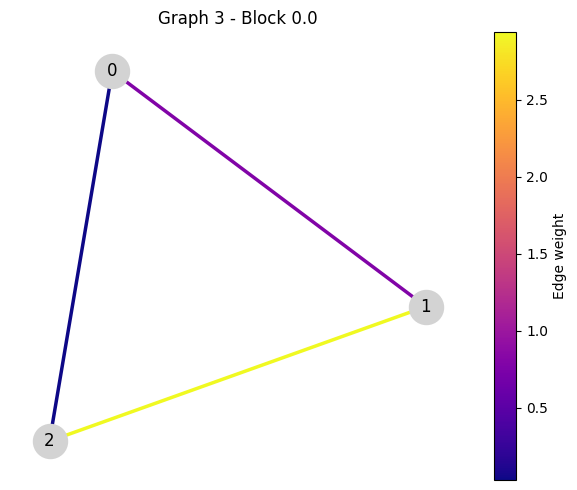

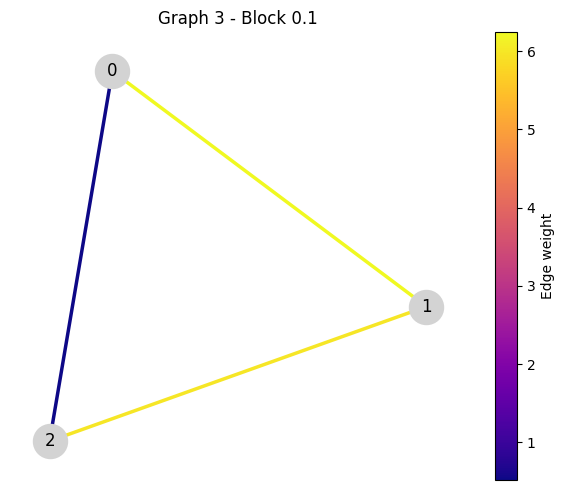

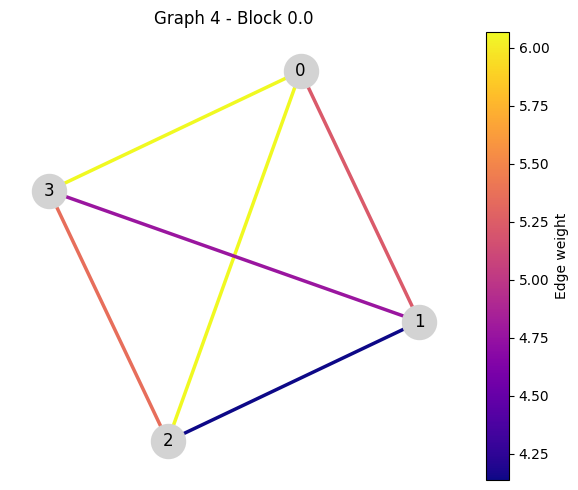

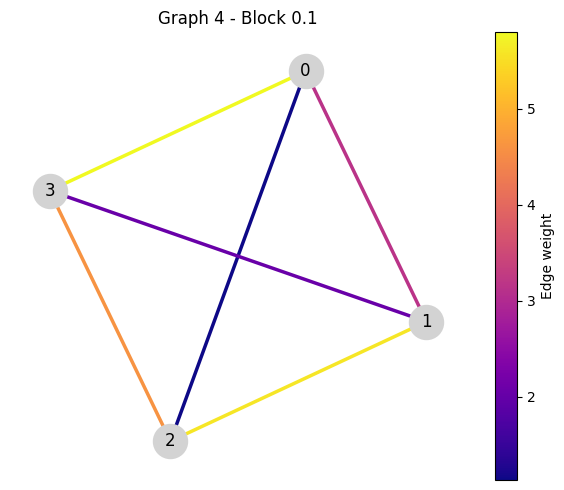

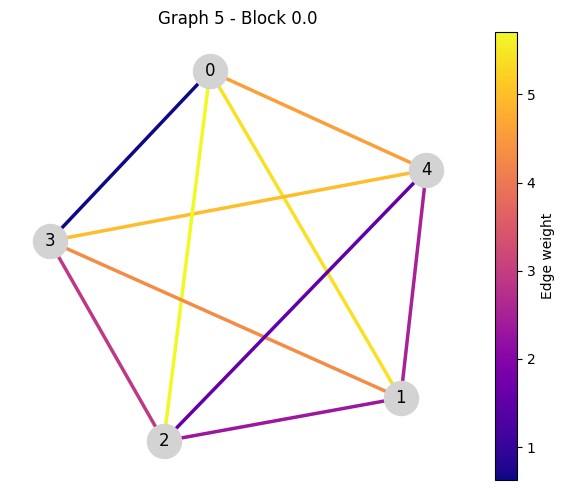

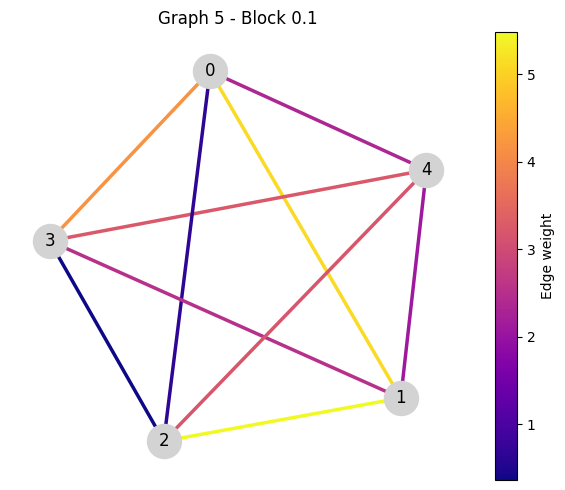

In [22]:
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Your graph definitions
graphs = {
    3: [[0, 1], [1, 2], [2, 0]],
    4: [[0, 1], [1, 2], [2, 3], [3, 0], [0, 2], [1, 3]],
    5: [[0, 1], [1, 2], [2, 3], [3, 4], [4, 0], [0, 2], [1, 3], [2, 4], [3, 0], [4, 1]]
}

# Load weights
weights3 =  torch.load('derma_results/current_results/grid_search1/model_weights_val_0.0035_48_custom_4_2_3_4_1e-07.pth', weights_only= True)
weights4 =  torch.load('derma_results/current_results/grid_search1/model_weights_val_0.0035_48_custom_4_2_4_4_1e-07.pth', weights_only= True)
weights5 =  torch.load('derma_results/current_results/grid_search1/model_weights_val_0.0035_48_custom_4_2_5_4_1e-07.pth', weights_only= True)

# Helper function to plot each graph
def plot_graph_with_weights(graph_edges, weights, title):
    G = nx.Graph()
    G.add_edges_from(graph_edges)

    # Get weights for the edges (last len(edges) values)
    edge_weights = weights[-len(graph_edges):].cpu().numpy()

    pos = nx.spring_layout(G, seed=42)  # consistent layout

    plt.figure(figsize=(6, 5))
    ax = plt.gca()  # Get current Axes

    # Draw the graph and capture the returned LineCollection for colorbar
    edges = nx.draw_networkx_edges(
        G, pos, edgelist=graph_edges,
        edge_color=edge_weights, edge_cmap=plt.cm.plasma, edge_vmin=min(edge_weights),
        edge_vmax=max(edge_weights), width=2.5, ax=ax
    )
    nx.draw_networkx_nodes(G, pos, node_color='lightgray', node_size=600, ax=ax)
    nx.draw_networkx_labels(G, pos, ax=ax)

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.plasma, norm=plt.Normalize(vmin=min(edge_weights), vmax=max(edge_weights)))
    sm.set_array(edge_weights)
    plt.colorbar(sm, ax=ax, label="Edge weight")

    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


# Plotting
plot_graph_with_weights(graphs[3],
                        weights3['transformer_blocks.0.0.mlp_sel.vqc.magic.weights'],
                        "Graph 3 - Block 0.0")

plot_graph_with_weights(graphs[3],
                        weights3['transformer_blocks.0.1.mlp_sel.vqc.magic.weights'],
                        "Graph 3 - Block 0.1")

plot_graph_with_weights(graphs[4],
                        weights4['transformer_blocks.0.0.mlp_sel.vqc.magic.weights'],
                        "Graph 4 - Block 0.0")

plot_graph_with_weights(graphs[4],
                        weights4['transformer_blocks.0.1.mlp_sel.vqc.magic.weights'],
                        "Graph 4 - Block 0.1")

plot_graph_with_weights(graphs[5],
                        weights5['transformer_blocks.0.0.mlp_sel.vqc.magic.weights'],
                        "Graph 5 - Block 0.0")

plot_graph_with_weights(graphs[5],
                        weights5['transformer_blocks.0.1.mlp_sel.vqc.magic.weights'],
                        "Graph 5 - Block 0.1")


In [52]:
import torch

def multilinear_form(A: torch.Tensor, vectors: list[torch.Tensor]) -> torch.Tensor:
    """
    Computes the multilinear form for an n-tensor A and n vectors:
    sum over all indices of A[i1, i2, ..., in] * v1[i1] * v2[i2] * ... * vn[in]

    Parameters:
    - A: torch.Tensor of shape (d, d, ..., d) with n dimensions
    - vectors: list of n torch.Tensors, each of shape (d,)

    Returns:
    - scalar (0D torch.Tensor)
    """
    n = A.dim()
    assert len(vectors) == n, f"Expected {n} vectors, got {len(vectors)}"

    # Create the Einstein summation string: e.g. for n=3 -> 'ijk,i,j,k->'
    # We'll assign letters from the alphabet for each dimension
    letters = 'abcdefghijklmnopqrstuvwxyz'
    assert n <= len(letters), "Too many dimensions for einsum letters."

    # Construct einsum subscripts
    A_subscript = letters[:n]
    vectors_subscripts = ','.join(letters[i] for i in range(n))
    einsum_str = f'{A_subscript},{vectors_subscripts}->'

    return torch.einsum(einsum_str, A, *vectors)

def identity_tensor(d: int, n: int) -> torch.Tensor:
    """
    Creates an n-dimensional identity tensor of shape (d, d, ..., d)
    with ones where all indices are equal, zeros elsewhere.
    """
    # Create an n-dimensional grid of indices
    indices = torch.arange(d)
    # Generate n copies of indices for broadcasting
    grids = torch.meshgrid(*([indices] * n), indexing='ij')
    # Stack to get shape (n, d, d, ..., d)
    stacked = torch.stack(grids)  # shape: (n, d, d, ..., d)

    # Check where all indices along the first dimension are equal
    # That is, all equal along axis=0
    equal_mask = torch.all(stacked == stacked[0], dim=0)

    return equal_mask.to(dtype=torch.float32)


Tensor_Dimension = 3
Embedding_Dimension = 3

A = identity_tensor(Embedding_Dimension, Tensor_Dimension) # torch.randn(*([d] * n))
print("Identity tensor A shape:", A.shape, "\n", A)
vectors = [torch.ones(Embedding_Dimension)*(_+1) for _ in range(Tensor_Dimension)]

result = multilinear_form(A, vectors)
print("Multilinear form result:", result.item())

Identity tensor A shape: torch.Size([3, 3, 3]) 
 tensor([[[1., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 1., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 1.]]])
Multilinear form result: 18.0


In [ ]:
import torch
import torch.nn as nn
import numbers

class NMultiheadSelfAttention(nn.Module):
    def __init__(
        self,
        embed_dim,
        num_heads,
        N=2,  # Order of multilinear form
        dropout={'embedding_attn': 0.225, 'after_attn': 0.225, 'feedforward': 0.225, 'embedding_pos': 0.225},
        RBF_similarity='none',
    ):
        super().__init__()
        assert embed_dim % num_heads == 0, f"Embedding dim {embed_dim} must be divisible by num_heads {num_heads}"

        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.head_dim = embed_dim // num_heads
        self.N = N
        self.RBF_similarity = RBF_similarity

        if self.N < 2:
            raise ValueError("N (order of multilinear form) must be at least 2.")
        elif self.N > 2 and self.RBF_similarity != 'none':
            raise ValueError("RBF similarity only implemented for N=2.")

        assert (
            RBF_similarity in ['none', 'quantum', 'linear']
            or (isinstance(RBF_similarity, numbers.Real) and 0 < RBF_similarity <= 1)  # type: ignore
        ), f"Invalid RBF_similarity: {RBF_similarity}"


        if self.RBF_similarity == 'quantum':
            self.quantum_ponderation = QuantumLayer(num_qubits=2, entangle=True, trainBool=True, graph='chain')
        elif self.RBF_similarity == 'linear':
            self.ponderation_param = nn.Parameter(torch.tensor(0.0))

        # One projection per tensor dimension
        self.projections = nn.ModuleList([nn.Linear(embed_dim, embed_dim) for _ in range(N)])

        self.v_proj = nn.Linear(embed_dim, embed_dim)  # Dedicated value projection
        self.o_proj = nn.Linear(embed_dim, embed_dim)
        self.dropout = nn.Dropout(dropout['embedding_attn'])

        # Learnable N-way tensor for multilinear attention
        if N != 2:
            self.A = nn.Parameter(torch.randn(*(self.N * (self.head_dim,))))
        else:
            self.register_buffer('A_identity', identity_tensor(d=self.head_dim, n=2))
    

    def forward(self, x):
        B, S, E = x.shape
        assert E == self.embed_dim

        # compute the N projections: each proj -> (B, S, H, D) then transpose to (B, H, S, D)
        proj_x = [
            proj(x).view(B, S, self.num_heads, self.head_dim).transpose(1, 2)  # -> (B, H, S, D)
            for proj in self.projections
        ]

        # build einsum string:
        # A has indexes a0 a1 ... a_{N-1}
        # projection n has subscript "b h token_n letter_n" where token_n is:
        #   - 'i' for mode 0 (query axis, kept)
        #   - 'j' for mode 1 (key axis, kept)
        #   - 's' for modes 2..N-1 (context axes, summed/marginalized)
        #
        # Result should be 'b h i j'
        # pools of letters
        tokens = list("ijk")  # token positions
        embeds = list("acdefguvwxyzlmnopqrst")  # embedding dims (avoid b,h,i,j,k,... collisions)

        assert self.N <= len(embeds), f"N too large, max {len(embeds)}"
        
        # subscripts for A (the N-way tensor)
        A_sub = "".join(embeds[:self.N])  # e.g. "abc" for N=3
        
        proj_subs = []
        for n in range(self.N):
            token = tokens[n] if n < 2 else tokens[2]  # first two → i,j ; rest → s (context)
            dim = embeds[n]                            # unique embedding letter
            proj_subs.append(f"bh{token}{dim}")
        
        # result: always bhij (standard 2D attention map)
        einsum_str = f"{A_sub}," + ",".join(proj_subs) + "->bhij"

        # Example N=3: 'acd,bhia,bhjc,bhkd->bhij'

        # execute einsum, resulting shape -> (B, H, S, S)
        # (this implicitly sums over the 's' token index for context modes)
        A = self.A if self.N != 2 else self.A_identity.to(x.device)
        attn_logits = torch.einsum(einsum_str, A, *proj_x)  # (B, H, S, S)

        # scale (similar to standard attention)
        attn_logits = attn_logits / (self.head_dim ** 0.5)

        # softmax over keys (j) to get attention weights per query i
        attn = torch.softmax(attn_logits, dim=-1)
        attn = self.dropout(attn)

        if self.RBF_similarity != 'none':
                if self.N != 2:
                    raise ValueError("RBF similarity is only implemented for standard 2D tensors products (Query and Key) ")
                # Compute RBF similarity
                if self.RBF_similarity == 'quantum':
                    ponderators = torch.sigmoid( self.quantum_ponderation( torch.zeros( (2,), device = x.device) ))
                elif isinstance(self.RBF_similarity, numbers.Real):    
                    ponderators = torch.tensor([1 - self.RBF_similarity, self.RBF_similarity], device=x.device, dtype=torch.float32)
                else: # RBF_similarity == 'linear'
                    sigmoid_val = torch.sigmoid(self.ponderation_param)
                    ponderators = torch.stack([1 - sigmoid_val, sigmoid_val])

                # promote to float32 for stability
                q32 = proj_x[0].float()
                k32 = proj_x[1].float()

                q_norm = (q32 ** 2).sum(dim=-1, keepdim=True)            # (B,H,S,1)
                k_norm = (k32 ** 2).sum(dim=-1, keepdim=True).transpose(-2, -1)  # (B,H,1,S)

                # distance
                dists_squared = q_norm + k_norm - 2 * (q32 @ k32.transpose(-2, -1))

                # clamp negative numerical noise
                dists_squared = dists_squared.clamp_min(0.0)

                # scale (avoid too-small / too-large)
                sigma_squared = q_norm.clamp_min(1e-8).clamp_max(1e4)  # tune upper bound as needed

                attn_RBF_logits = torch.exp(-dists_squared / sigma_squared)

                denom = attn_RBF_logits.sum(dim=-1, keepdim=True).clamp_min(1e-8)
                attn_RBF = attn_RBF_logits / denom

                attn_RBF = self.dropout(attn_RBF)

                if (~torch.isfinite(attn_RBF)).any():
                    import warnings
                    print(f"Registered non-finite attn. ponderators={ponderators}")
                    warnings.warn(f"Non-finite RBF attention detected. Ponderators = {ponderators}", RuntimeWarning)
                    
                # sanitize just in case
                attn_RBF = torch.nan_to_num(attn_RBF, nan=0.0, posinf=0.0, neginf=0.0)

                # mix (ponderators assumed roughly sum=1 but be safe)

                weight_sum = ponderators[0] + ponderators[1]
                attn = (ponderators[0] * attn + ponderators[1] * attn_RBF) / (weight_sum + 1e-7)

        # compute values using dedicated v_proj (so values are independent of mode projections)
        v = self.v_proj(x).view(B, S, self.num_heads, self.head_dim).transpose(1, 2)  # (B,H,S,D)

        # weighted sum: (B,H,S,D) = sum_j attn[b,h,i,j] * v[b,h,j,d]
        values = torch.einsum("bhij,bhjd->bhid", attn, v)

        # reshape back to (B, S, E)
        values = values.transpose(1, 2).reshape(B, S, E)

        out = self.o_proj(values)

        return out, attn

class MultiheadSelfAttention(nn.Module):
        def __init__(self, embed_dim, num_heads, dropout={'embedding_attn': 0.225, 'after_attn': 0.225, 'feedforward': 0.225, 'embedding_pos': 0.225}, RBF_similarity = False, tensor_dimension = 2):
            super().__init__()
            assert embed_dim % num_heads == 0, f"Embedding dimension ({embed_dim}) should be divisible by number of heads ({num_heads})"

            self.embed_dim = embed_dim
            self.num_heads = num_heads
            self.head_dim = embed_dim // num_heads
            self.tensor_dimension = tensor_dimension
            assert RBF_similarity == 'none' or RBF_similarity == 'quantum' or RBF_similarity == 'linear' or (isinstance(RBF_similarity, numbers.Real) and 0 < RBF_similarity <= 1), f"RBF_similarity must be set to 'none', 'quantum', 'linear' or a float between 0 and 1, but got {RBF_similarity}"
            self.RBF_similarity = RBF_similarity
            print(f'Setting up multihead self-attention with RBF_similarity: {self.RBF_similarity}')

            if self.RBF_similarity == 'quantum':
                self.quantum_ponderation = QuantumLayer(num_qubits=2, entangle= True, trainBool= True, graph= 'chain' )
            elif self.RBF_similarity == 'linear':
                self.ponderation_param = nn.Parameter(torch.tensor(0.0))  # initialized at 0 → sigmoid = 0.5
    
            print('Started a MutliheadSelfAttention layer with embed_dim:', embed_dim, 'num_heads:', num_heads, 'head_dim:', self.head_dim, 'RBF_similarity:', self.RBF_similarity)

            self.q_proj = nn.Linear(embed_dim, embed_dim)
            self.k_proj = nn.Linear(embed_dim, embed_dim)
            self.v_proj = nn.Linear(embed_dim, embed_dim)
            self.dropout = nn.Dropout(dropout['embedding_attn'])
            self.o_proj = nn.Linear(embed_dim, embed_dim)

        def rank_patches_by_attention(attn: torch.Tensor) -> torch.Tensor:
            """
            Ranks image patches by the total attention they receive.

            """
            # Average over heads: (B, T, T)
            attn_mean = attn.mean(dim=1)

            # Total attention received by each token: sum over the source positions (axis=-2)
            # attention_received[b, j] = sum over i of attn[b, i, j]
            attention_received = attn_mean.sum(dim=1)  # shape: (B, T)

            # Sort patches by total attention received, descending
            sorted_indices = attention_received.argsort(dim=1, descending=True)  # shape: (B, T)

            return sorted_indices



        def forward(self, x):
            batch_size, seq_len, embed_dim = x.shape
            # x.shape = (batch_size, seq_len, embed_dim)
            assert embed_dim == self.embed_dim, f"Input embedding dimension ({embed_dim}) should match layer embedding dimension ({self.embed_dim})"

            q, k, v = [
                proj(x).reshape(batch_size, seq_len, self.num_heads, self.head_dim).transpose(1, 2)
                for proj, x in zip([self.q_proj, self.k_proj, self.v_proj], [x, x, x])
            ]

            # Compute scaled dot-product attention
            qk_dot = q @ k.transpose(-2, -1)

            attn_logits = ( qk_dot / (self.head_dim ** 0.5))
            # attn_logits.shape = (batch_size, num_heads, seq_len, seq_len)
            attn = attn_logits.softmax(dim=-1)
            # attn.shape = (batch_size, num_heads, seq_len, seq_len)
            attn = self.dropout(attn)

            if self.RBF_similarity != 'none':
                if self.tensor_dimension != 2:
                    raise ValueError("RBF similarity is only implemented for standard 2D tensors products (Query and Key) ")
                # Compute RBF similarity
                if self.RBF_similarity == 'quantum':
                    ponderators = torch.sigmoid( self.quantum_ponderation( torch.zeros( (2,), device = x.device) ))
                elif isinstance(self.RBF_similarity, numbers.Real):    
                    ponderators = torch.tensor([1 - self.RBF_similarity, self.RBF_similarity], device=x.device, dtype=torch.float32)
                else: # RBF_similarity == 'linear'
                    sigmoid_val = torch.sigmoid(self.ponderation_param)
                    ponderators = torch.stack([1 - sigmoid_val, sigmoid_val])

                # promote to float32 for stability
                q32 = q.float()
                k32 = k.float()

                q_norm = (q32 ** 2).sum(dim=-1, keepdim=True)            # (B,H,S,1)
                k_norm = (k32 ** 2).sum(dim=-1, keepdim=True).transpose(-2, -1)  # (B,H,1,S)

                # distance
                dists_squared = q_norm + k_norm - 2 * (q32 @ k32.transpose(-2, -1))

                # clamp negative numerical noise
                dists_squared = dists_squared.clamp_min(0.0)

                # scale (avoid too-small / too-large)
                sigma_squared = q_norm.clamp_min(1e-8).clamp_max(1e4)  # tune upper bound as needed

                attn_RBF_logits = torch.exp(-dists_squared / sigma_squared)

                denom = attn_RBF_logits.sum(dim=-1, keepdim=True).clamp_min(1e-8)
                attn_RBF = attn_RBF_logits / denom

                attn_RBF = self.dropout(attn_RBF)

                if (~torch.isfinite(attn_RBF)).any():
                    import warnings
                    print(f"Registered non-finite attn. ponderators={ponderators}")
                    warnings.warn(f"Non-finite RBF attention detected. Ponderators = {ponderators}", RuntimeWarning)
                    
                # sanitize just in case
                attn_RBF = torch.nan_to_num(attn_RBF, nan=0.0, posinf=0.0, neginf=0.0)

                # mix (ponderators assumed roughly sum=1 but be safe)

                weight_sum = ponderators[0] + ponderators[1]
                attn = (ponderators[0] * attn + ponderators[1] * attn_RBF) / (weight_sum + 1e-7)


            # Compute output
            values = attn @ v
            # values.shape = (batch_size, num_heads, seq_len, head_dim)
            values = values.transpose(1, 2).reshape(batch_size, seq_len, embed_dim)
            # values.shape = (batch_size, seq_len, embed_dim)
            x = self.o_proj(values)
            # x.shape = (batch_size, seq_len, embed_dim)

            return x, attn

NHead2 = NMultiheadSelfAttention(embed_dim=48, num_heads=2, N=2, RBF_similarity='linear')
NHead3 = NMultiheadSelfAttention(embed_dim=48, num_heads=1, N=3, RBF_similarity='none')
NHead4 = NMultiheadSelfAttention(embed_dim=48, num_heads=1, N=4, RBF_similarity='none')

Head2 = MultiheadSelfAttention(embed_dim=48, num_heads=2, RBF_similarity='linear')


x = torch.randn(2, 10, 48)  # (B, S, E)

Setting up multihead self-attention with RBF_similarity: linear
Started a MutliheadSelfAttention layer with embed_dim: 48 num_heads: 2 head_dim: 24 RBF_similarity: linear


In [66]:
out, attn = NHead3(x)

out, attn = NHead4(x)

Einsum string: acd,bhia,bhjc,bhkd->bhij
Attention logits shape: torch.Size([2, 1, 10, 10])
Einsum string: acde,bhia,bhjc,bhkd,bhke->bhij
Attention logits shape: torch.Size([2, 1, 10, 10])


# Comprobación de que coincida en el caso $N=2$ y $A=I_2$

In [87]:
NHead2.eval() # Multilinear
Head2.eval()  # Standard
A = identity_tensor(24, 2)

NHead2.A.data = A

NHead2.projections[0].weight.data = Head2.q_proj.weight.data.clone()
NHead2.projections[1].weight.data = Head2.k_proj.weight.data.clone()
NHead2.v_proj.weight.data = Head2.v_proj.weight.data.clone()
NHead2.o_proj.weight.data = Head2.o_proj.weight.data.clone()

NHead2.projections[0].bias.data = Head2.q_proj.bias.data.clone()
NHead2.projections[1].bias.data = Head2.k_proj.bias.data.clone()
NHead2.v_proj.bias.data = Head2.v_proj.bias.data.clone()
NHead2.o_proj.bias.data = Head2.o_proj.bias.data.clone()


print("Weights copied.")


out2, attn2 = NHead2(x)
out, attn = Head2(x)

print(torch.sum(out2 - out))  # Should be close to 0




Weights copied.
Einsum string: ac,bhia,bhjc->bhij
Attention logits shape: torch.Size([2, 2, 10, 10])
tensor(0., grad_fn=<SumBackward0>)


In [6]:
B, S, E, H, D, N = 2, 10, 48, 4, 12, 3
A = torch.randn(D, D, D)
proj0 = torch.randn(B, H, S, D)
proj1 = torch.randn(B, H, S, D)
proj2 = torch.randn(B, H, S, D)

out = torch.einsum("acd,bhia,bhjc,bhsd->bhij", A, proj0, proj1, proj2)

print(out.shape)  # (2, 4, 10, 10)


torch.Size([2, 4, 10, 10])


In [1]:
0.9875**175

0.11066065901675068